# Dog Breed Classifier

The goal of this project is to be able to classify different dog breeds the best we can. Let's import any packakes we think we'll need for now.

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os, sys
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score

We notice that the data of the images are not the same size. In order to apply a Convolutional NN to this data, we need to resize the images to a common size. We will do 256 x 256 pixels.

In [2]:
PATH_TO_TRAIN = "/Users/meyern/Downloads/all/data/train/"
PATH_TO_TEST = "/Users/meyern/Downloads/all/data/test/"
img_size = (256,256)

# resize each image to 100x100 pixels
def resize(path_str, size):
    dirs = os.listdir(path_str)
    for item in dirs:
        if os.path.isfile(path_str+item):
            im = Image.open(path_str+item)
            f, e = os.path.splitext(path_str+item)
            imResize = im.resize(size, Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

In [4]:
resize(PATH_TO_TRAIN, img_size)
resize(PATH_TO_TEST, img_size)

In [5]:
labels = pd.read_csv('labels.csv')


def get_img_array(train = True):
    if train == True:
        s = (len(labels['breed']), 256, 256, 3)
        allImage = np.zeros(s)
        i=0
        for k in labels['id'].values:
            image = PIL.Image.open(PATH_TO_TRAIN+k+'.jpg')
            image = np.array(image)
            image = np.clip(image/255.0, 0.0, 1.0)
            i+=1
            allImage[i-1]=image
        return allImage
    else:
        s = (len(os.listdir(PATH_TO_TEST)), 256, 256, 3)
        allImage = np.zeros(s)
        i=0
        for j in os.listdir(PATH_TO_TEST):
            image = PIL.Image.open(PATH_TO_TEST+j)
            image = np.array(image)
            image = np.clip(image/255.0, 0.0, 1.0)
            i+=1
            allImage[i-1]=image
        return allImage

In [6]:
train_data = get_img_array(train=True)
test_data = get_img_array(train=False)
print("Train Shape: ", train_data.shape)
print("Test Shape: ", test_data.shape)

Train Shape:  (10222, 256, 256, 3)
Test Shape:  (10357, 256, 256, 3)


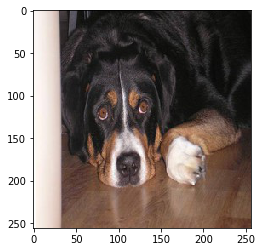

In [7]:
im = train_data[200,:,:,:]
plt.imshow(im)
plt.show()

In [8]:
from scipy.stats import itemfreq

TOP_N_DOGS = 8

def filter_main_dogs(top_n_dogs, all_breeds = 'TRUE'):
    label_freq = itemfreq(labels['breed'])
    label_freq = label_freq[label_freq[:, 1].argsort()[::-1]]
    if all_breeds == 'FALSE':
        main_dogs = label_freq[:,0][0:TOP_N_DOGS]
    else:
        main_dogs = label_freq[:,:][:]

    labels_matrix = labels['breed'].as_matrix()
    labels_matrix = labels_matrix.reshape(labels_matrix.shape[0],1)
    labels_filtered_index = np.where(labels_matrix == main_dogs)
    return labels_filtered_index

filter_main_dogs(TOP_N_DOGS,all_breeds='FALSE')



/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  
/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


(array([    9,    12,    57,    79,    80,    88,    90,   118,   122,
          141,   146,   161,   164,   165,   219,   223,   226,   229,
          230,   233,   235,   237,   238,   242,   262,   265,   268,
          271,   276,   288,   306,   310,   333,   351,   357,   360,
          362,   377,   392,   407,   408,   427,   451,   453,   480,
          486,   488,   489,   509,   510,   542,   546,   553,   555,
          568,   576,   588,   599,   613,   620,   625,   628,   654,
          686,   695,   697,   700,   723,   738,   744,   751,   763,
          777,   782,   783,   785,   802,   809,   828,   834,   860,
          871,   887,   893,   895,   913,   916,   932,   957,   976,
          980,  1014,  1047,  1062,  1068,  1103,  1124,  1127,  1140,
         1143,  1148,  1162,  1165,  1171,  1182,  1199,  1200,  1201,
         1206,  1223,  1230,  1238,  1243,  1260,  1294,  1309,  1310,
         1321,  1327,  1329,  1343,  1377,  1395,  1426,  1427,  1428,
      

In [9]:
filtered_labels = filter_main_dogs(TOP_N_DOGS, all_breeds='FALSE')
filtered_label_index = labels.iloc[filtered_labels[0],:]
train_filtered = train_data[filtered_labels[0],:,:,:]


/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  
/Users/meyern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


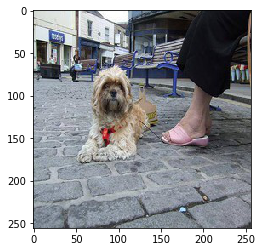

This is a(n) shih-tzu


In [10]:
# Scottish Deerhound
w=100
im = train_filtered[w,:,:,:]
plt.imshow(im)
plt.show()
print("This is a(n)", filtered_label_index['breed'].iloc[w])

In [11]:
label_values = filtered_label_index['breed'].values
label_values

array(['scottish_deerhound', 'maltese_dog', 'shih-tzu',
       'scottish_deerhound', 'entlebucher', 'entlebucher', 'maltese_dog',
       'bernese_mountain_dog', 'entlebucher', 'shih-tzu', 'afghan_hound',
       'scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog',
       'bernese_mountain_dog', 'bernese_mountain_dog', 'maltese_dog',
       'shih-tzu', 'great_pyrenees', 'scottish_deerhound',
       'scottish_deerhound', 'scottish_deerhound', 'maltese_dog',
       'afghan_hound', 'shih-tzu', 'bernese_mountain_dog', 'afghan_hound',
       'shih-tzu', 'great_pyrenees', 'bernese_mountain_dog',
       'bernese_mountain_dog', 'pomeranian', 'pomeranian',
       'bernese_mountain_dog', 'afghan_hound', 'shih-tzu',
       'scottish_deerhound', 'afghan_hound', 'great_pyrenees',
       'afghan_hound', 'pomeranian', 'afghan_hound', 'pomeranian',
       'maltese_dog', 'scottish_deerhound', 'bernese_mountain_dog',
       'entlebucher', 'scottish_deerhound', 'bernese_mountain_dog',
       'shih-

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(label_values)
labels_one_hot = le.transform(label_values)
print(labels_one_hot)
# print(list(le.inverse_transform(labels_one_hot)))

[6 4 7 6 2 2 4 1 2 7 0 6 4 1 1 1 4 7 3 6 6 6 4 0 7 1 0 7 3 1 1 5 5 1 0 7 6
 0 3 0 5 0 5 4 6 1 2 6 1 7 0 2 4 2 0 3 2 6 4 7 2 7 6 3 4 0 4 4 1 0 3 6 1 6
 0 7 5 3 7 2 3 4 7 0 5 6 4 1 2 5 5 6 2 6 1 0 4 7 3 0 7 5 4 3 7 3 0 1 3 2 1
 1 1 6 3 3 4 3 3 1 2 1 6 3 1 1 6 4 0 2 2 1 5 7 0 6 5 2 5 5 1 6 7 5 0 7 0 2
 4 1 7 1 6 7 3 2 6 7 0 5 4 2 5 7 0 5 4 3 0 3 7 2 5 2 4 6 5 3 5 2 5 5 5 4 5
 2 3 6 6 2 7 4 0 1 4 4 2 4 2 6 1 6 3 3 6 1 4 3 4 3 4 1 5 0 6 4 4 6 4 6 0 3
 1 4 6 6 0 2 7 4 7 6 1 3 1 4 7 1 4 5 7 0 2 7 6 6 5 0 7 1 1 6 4 4 3 0 1 3 2
 5 3 1 4 6 4 4 2 3 5 5 5 3 0 1 0 6 1 4 3 0 2 4 5 5 3 4 0 4 1 7 7 4 4 4 0 5
 5 4 1 1 5 6 3 0 0 2 1 2 4 0 7 7 1 5 2 7 2 0 6 4 0 5 4 1 4 6 2 7 2 3 5 3 5
 2 7 7 2 5 4 4 1 2 6 5 6 2 0 6 2 4 2 1 5 1 3 6 0 3 5 4 4 3 2 5 0 5 2 6 6 5
 2 1 3 2 5 3 5 5 3 2 4 0 4 6 5 7 6 2 3 5 7 2 7 0 5 4 3 1 3 6 4 6 0 2 0 1 6
 2 0 6 3 2 6 3 4 0 2 3 6 0 0 7 3 0 1 6 6 3 1 1 4 6 2 5 5 0 0 5 0 7 5 5 2 0
 0 1 6 0 1 5 6 6 6 5 7 1 6 4 0 7 7 6 3 6 0 7 6 5 3 7 6 6 0 5 1 6 6 4 5 3 6
 7 0 4 6 5 5 2 5 5 7 6 5 

# Apply a Convolutional Neural Network to the data

In [13]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

channels = 3
img_dim = 256
n_outputs = TOP_N_DOGS
conv1_filters = 32
conv1_stride = 1
conv1_ksize = 5

conv2_filters = 64
conv2_stride = 1
conv2_ksize = 5

conv3_filters = 128
conv3_stride = 1
conv3_ksize = 5

conv1_pad = 'SAME'
conv2_pad = 'SAME'
conv3_pad = 'SAME'

conv2_dropout_rate = 0.2
conv1_dropout_rate = 0.2
conv3_dropout_rate = 0.2
pool3_filter_maps = conv2_filters

n_fc1 = 500
fc1_dropout_rate = 0.3

In [14]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, img_dim, img_dim, channels], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, img_dim, img_dim, channels])
    y = tf.placeholder(tf.int32, name = 'y', shape=[None])
    training = tf.placeholder_with_default(False, shape=[], name = "training")
    
conv1 = tf.layers.conv2d(X_reshaped,
                         activation=tf.nn.relu, 
                         filters=conv1_filters, 
                         strides=conv1_stride, 
                         padding=conv1_pad, 
                         kernel_size = conv1_ksize, 
                         name='conv1')


with tf.name_scope("pool1"):
    pool1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
#     pool2_flatten = tf.reshape(pool2, shape=[-1, 32*32*pool3_filter_maps])
#     pool2_flat_drop = tf.layers.dropout(pool2_flatten, conv1_dropout_rate, training=training)
    
    
conv2 = tf.layers.conv2d(pool1, 
                         activation=tf.nn.relu, 
                         filters=conv2_filters, 
                         strides=conv2_stride, 
                         padding=conv2_pad, 
                         kernel_size = conv2_ksize, 
                         name='conv2')

with tf.name_scope("pool2"):
    pool2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
#     pool3_flatten = tf.reshape(pool3, shape=[-1, 64*64*pool3_filter_maps])
#     pool3_flat_drop = tf.layers.dropout(pool3_flatten, conv2_dropout_rate, training=training)

conv3 = tf.layers.conv2d(pool2, 
                         activation=tf.nn.relu, 
                         filters=conv3_filters, 
                         strides=conv3_stride, 
                         padding=conv3_pad, 
                         kernel_size = conv3_ksize, 
                         name='conv3')

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    pool3_flatten = tf.reshape(pool3, shape=[-1, 64*64*64])
    pool3_flat_drop = tf.layers.dropout(pool3_flatten, conv2_dropout_rate, training=training)
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1_drop, n_outputs, name="logits")
    Y_proba = tf.nn.softmax(logits=logits, name="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [15]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_filtered, labels_one_hot, test_size = 0.2)

/Users/meyern/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [17]:
# n_epochs = 20
# batch_size = 50

# with tf.Session() as sess:
#     init.run()
    
#     train_loss = []
#     val_loss = []
#     for epoch in range(n_epochs):
#         for iteration in range(len(x_train) // batch_size):
#             X_batch, y_batch = next_batch(batch_size, x_train, y_train)
#             sess.run(training_op, feed_dict ={X: X_batch, y: y_batch})
#         acc_train = accuracy.eval(feed_dict={X: X_batch,y: y_batch})
#         acc_val = accuracy.eval(feed_dict={X:x_test, y:y_test})
#         train_loss.append(acc_train)
#         val_loss.append(acc_val)
#         print(epoch, "Train Accuracy: ", acc_train, "Val_Accuracy: ", acc_val)
#     save_path = saver.save(sess, "/Users/meyern/Downloads/all/my_model_final.ckpt")
    
#     plt.plot(train_loss, label = 'Training Loss')
#     plt.plot(val_loss, label = 'Validation Loss')
#     plt.legend()
#     X_test = np.asarray(test, dtype=np.float32)
#     X_test = X_test / 255
    
#     Z = logits.eval(session=sess, feed_dict={X:X_test})
#     y_pred = np.argmax(Z, axis=1)

In [36]:
import keras
from keras_preprocessing import image
from keras_applications import xception

INPUT_SIZE = 256
BATCH_SIZE = 16
SEED = 42
NUM_CLASSES = 120

label_enc = preprocessing.LabelEncoder()

np.random.seed(seed=SEED)
rnd = np.random.random(len(labels))
train_idx = rnd < 0.9
valid_idx = rnd >= 0.9
y_train = label_enc.fit_transform(labels["breed"].values)
ytr = y_train[train_idx]
yv = y_train[valid_idx]



def read_img(img_id, path, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    img = image.load_img(join(path, '{}.jpg'.format(img_id)), target_size=size)
    return image.img_to_array(img)

def show_img(img, label, ax):
    ax.imshow(img / 255.)
    ax.text(10, 200, 'LABEL: {}'.format(label), color='k', backgroundcolor='w', alpha=0.8)
    ax.axis('off')

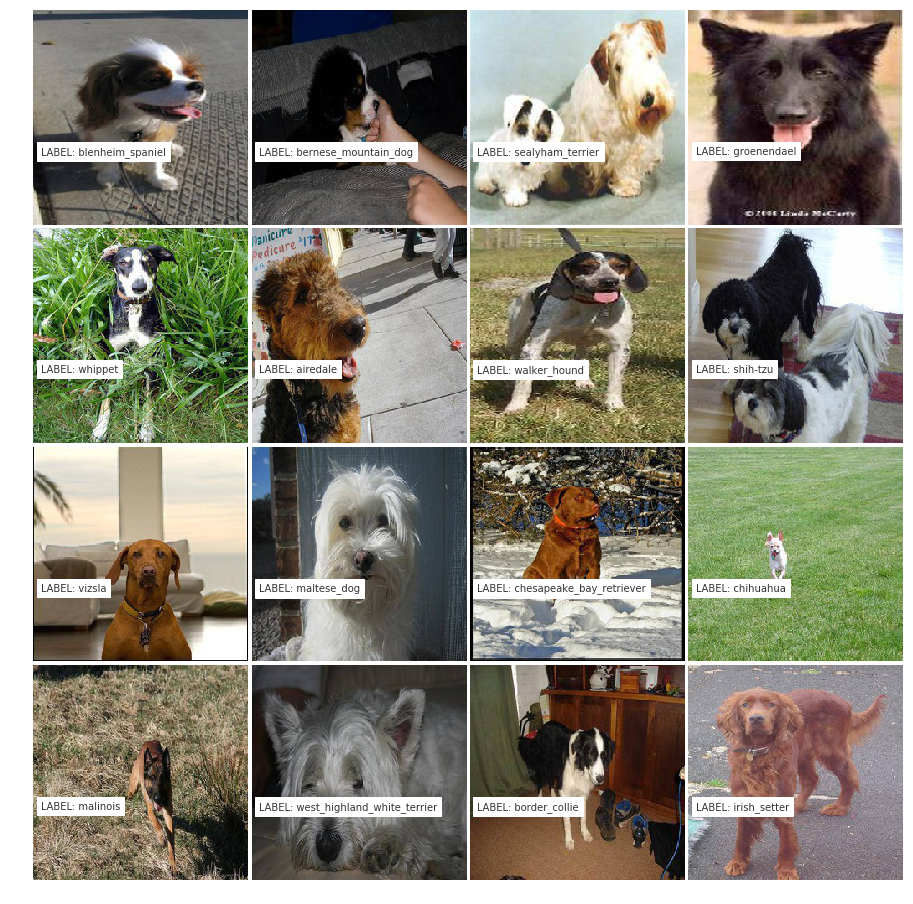

In [37]:
from mpl_toolkits.axes_grid1 import ImageGrid
from os.path import join, exists, expanduser

fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.05)
for i, idx in enumerate(np.random.choice(list(range(10000)), size=16)):
    ax = grid[i]
    show_img(read_img(labels['id'][idx], PATH_TO_TRAIN, (299, 299)), label=labels['breed'][idx], ax=ax)
plt.show()

In [38]:
x_train = np.zeros((train_idx.sum(), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
x_valid = np.zeros((valid_idx.sum(), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
train_i = 0
valid_i = 0

for i, img_id in tqdm(enumerate(labels['id'])):
    img = read_img(img_id, PATH_TO_TRAIN, (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
    if train_idx[i]:
        x_train[train_i] = x
        train_i += 1
    elif valid_idx[i]:
        x_valid[valid_i] = x
        valid_i += 1
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))

10222it [00:24, 416.29it/s]

Train Images shape: (9242, 256, 256, 3) size: 1,817,051,136


In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator()

In [42]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input

base_model = xception.Xception(weights='imagenet', include_top=False)
x = base_model.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have NUM_CLASSES classes
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

83689472/83683744 [==============================] - 7s 0us/step


In [43]:
model = Model(inputs=base_model.input, outputs=predictions)

In [52]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [62]:
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_acc', patience=5)
STAMP = "{}_dog_breed_model".format(datetime.date.today().strftime("%Y-%m-%d"))

bst_model_path = "models/{}.h5".format(STAMP)
model_checkpoint = ModelCheckpoint(bst_model_path,
                                   save_best_only=True,
                                   save_weights_only=True)

# Authors suggest setting step_size = (2-8) x (training iterations in epoch)
step_size = 2000
# clr = CyclicLR(base_lr=0.0001,
#                max_lr=0.001,
#                step_size=step_size,
#                mode='exp_range',
#                gamma=0.99994)

In [63]:
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
optimizer = RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [64]:
hist = model.fit_generator(train_datagen.flow(x_train, ytr, batch_size=BATCH_SIZE),
                           steps_per_epoch=train_idx.sum() // BATCH_SIZE,
                           epochs=50, callbacks=[early_stopping, model_checkpoint],
                           validation_data=test_datagen.flow(x_valid, yv, batch_size=BATCH_SIZE),
                           validation_steps=valid_idx.sum() // BATCH_SIZE)

Epoch 1/50
 12/577 [..............................] - ETA: 2:16:12 - loss: 5.0836 - acc: 0.0625

KeyboardInterrupt: 